# ML

In [1]:
import seaborn as sns

iris = sns.load_dataset("iris")

In [2]:
type(iris)

pandas.core.frame.DataFrame

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# https://stackoverflow.com/questions/36622237/jupyter-notebook-inline-plots-as-svg
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

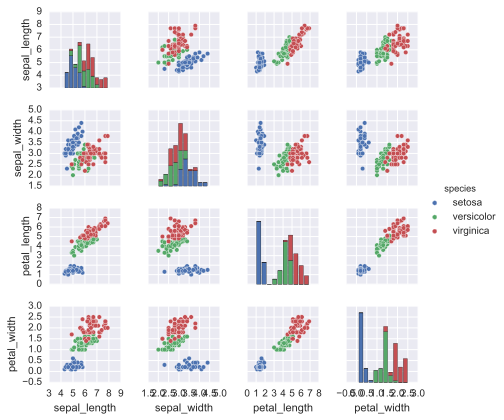

In [5]:
%matplotlib inline

import seaborn as sns
sns.set()

sns.pairplot(iris, hue="species", size=1.5)

In [6]:
X_iris = iris.drop("species", axis=1)
y_iris = iris["species"]

In [7]:
X_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [8]:
y_iris.head(3)

0    setosa
1    setosa
2    setosa
Name: species, dtype: object

In [9]:
X_iris.shape

(150, 4)

In [10]:
y_iris.shape

(150,)

## Supervised learning with SLR

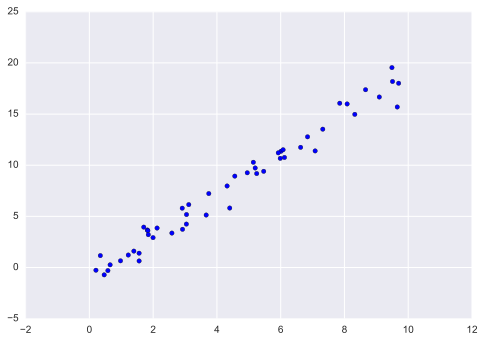

In [11]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [12]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
X = x[:, np.newaxis]
X[:3]

array([[3.74540119],
       [9.50714306],
       [7.31993942]])

In [15]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
model.coef_

array([1.9776566])

In [17]:
model.intercept_

-0.903310725531111

In [18]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

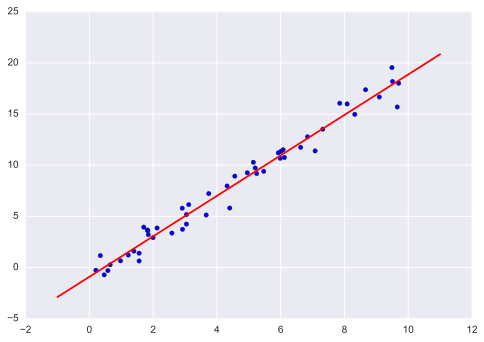

In [19]:
plt.scatter(x, y)
plt.plot(xfit, yfit, color="red")

## Gaussian Naive Bayes

In [20]:
#! pip install -U scikit-learn==0.18

In [21]:
! pip show matplotlib

Name: matplotlib
Version: 2.2.2
Summary: Python plotting package
Home-page: http://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: BSD
Location: c:\anaconda2\lib\site-packages
Requires: numpy, cycler, pyparsing, python-dateutil, pytz, six, kiwisolver, backports.functools-lru-cache
Required-by: seaborn, scikit-image, py-heat, py-heat-magic, jupyterthemes, arch


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [22]:
try:
    from sklearn.cross_validation import train_test_split
except:
    from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


c:\anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.9736842105263158

... well that was effective.

## PCA

In [25]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)


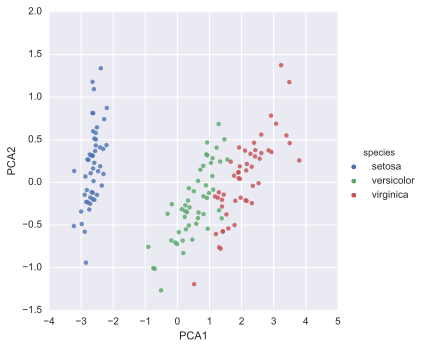

In [26]:
iris["PCA1"] = X_2D[:,0]
iris["PCA2"] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue="species", data=iris, fit_reg=False)

## Clustering

In [27]:
from sklearn.mixture import GMM  # looks like this is targeted for deprication in  0.2

model = GMM(n_components=3, covariance_type="full")
model.fit(X_iris)
y_gmm = model.predict(X_iris)


c:\anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
c:\anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
c:\anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log

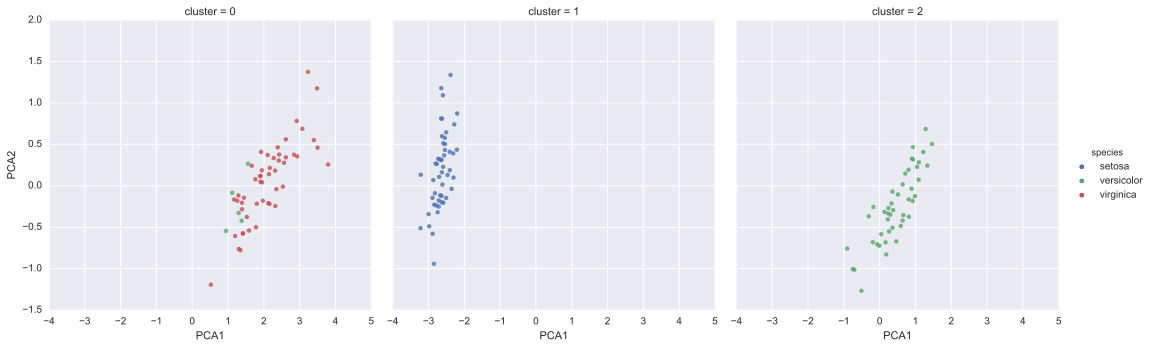

In [28]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue="species", col="cluster", fit_reg=False)

## Exploring handwritten digits

In [29]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

1,797 samples consisting of 8x8 grid of pixels.

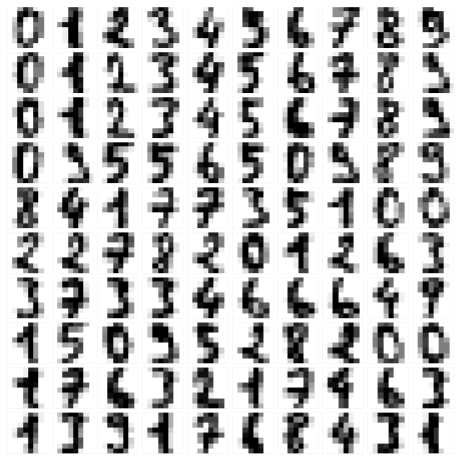

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={"xticks":[], "yticks":[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")


Treat each pixel as a feature...

In [31]:
len(digits.images)

1797

In [32]:
data = digits.images[0]
data

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

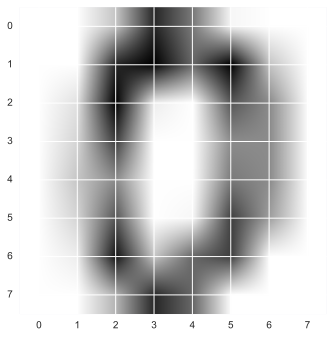

In [33]:
from matplotlib import pyplot as plt

plt.imshow(data)
plt.show()

Dimensions are reduced to 2 using an unsupervised method.

In [34]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

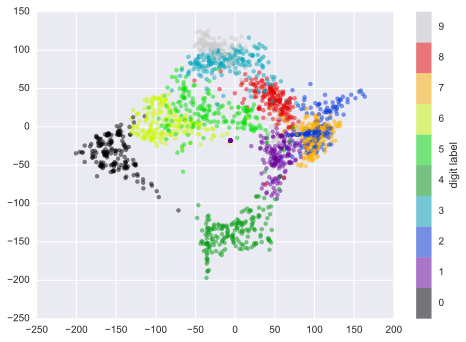

In [35]:
# https://matplotlib.org/tutorials/colors/colormaps.html
plt.scatter(
    data_projected[:,0],
    data_projected[:,1],
    c=digits.target,
    edgecolor="none",
    alpha=0.5,
    cmap=plt.cm.get_cmap("nipy_spectral", 10),
)

plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5)

In [36]:
X = digits.data
y = digits.target

X.shape

(1797, 64)

In [37]:
y.shape

(1797,)

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [39]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

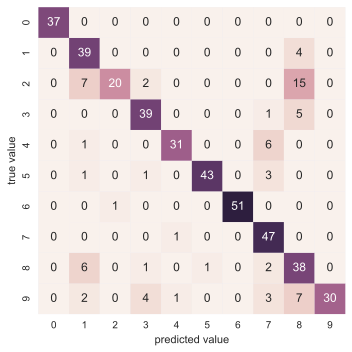

In [41]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")


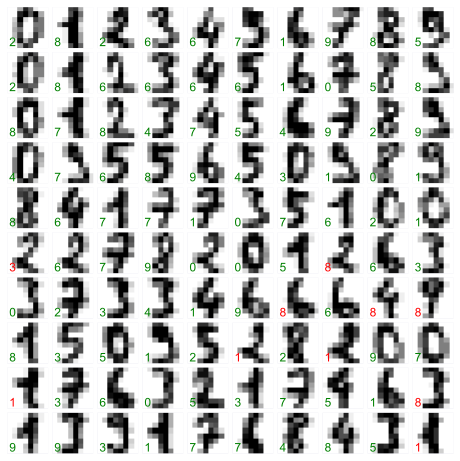

In [42]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={"xticks":[], "yticks":[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color="green" if (ytest[i] == y_model[i]) else "red")

# hmmm... 

## Model validation the wrong way

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()

In [44]:
type(iris)

sklearn.datasets.base.Bunch

In [45]:
X = iris.data
y = iris.target

In [46]:
#[item for item in dir(iris.data) if not item.startswith("__")]

In [47]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

In [49]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [50]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [51]:
y_model = model.predict(X)

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y, y_model)

1.0

This trains and evaluates our model on the same data...

## Model validation done right: holdout sets

In [53]:
from sklearn.cross_validation import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

In [54]:
model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [55]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

The holdout set is similar to unknown data, because the model has not seen it before.

## Model validation via cross validation
Using the holdout approach we have lost a portion of our data to validation. We cau do cross validation instead - break the data into sections and separately train and validate over each section (swapping as we go)...

In [56]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

Here we have two-fold cross validation: the data is split into two sets and used each in turn as a validatin set.

In [57]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [58]:
from sklearn.cross_validation import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

We could go to the extreme case of leaving one out...

In [59]:
from sklearn.cross_validation import cross_val_score, LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
np.mean(scores)

0.96

In [61]:
scores.mean()

0.96

## Selecting the best model
The question of best model is a trade off between bias and variance.

Let's take a look at validation curves.

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


In [63]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err + rng.randn(N)
    return X, y


In [64]:
a = np.array([range(5), range(5)])
a

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [65]:
help(a.ravel)

Help on built-in function ravel:

ravel(...) method of numpy.ndarray instance
    a.ravel([order])
    
    Return a flattened array.
    
    Refer to `numpy.ravel` for full documentation.
    
    See Also
    --------
    numpy.ravel : equivalent function
    
    ndarray.flat : a flat iterator on the array.



In [66]:
a.ravel()

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [67]:
X, y = make_data(40)

X.size, y.size

(40, 40)

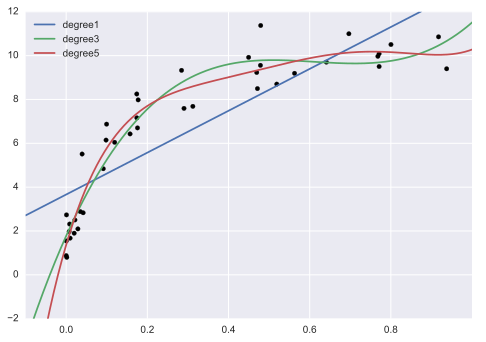

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color="black")
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label="degree{0}".format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")


c:\anaconda2\envs\py36\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


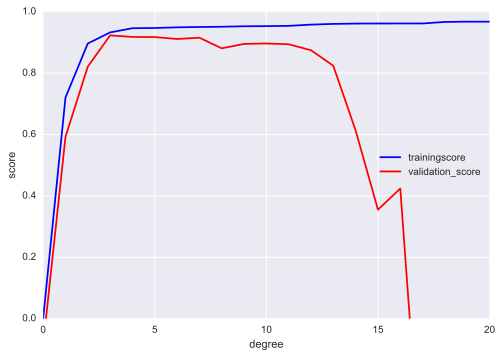

In [69]:
from sklearn.learning_curve import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(),
    X, y,
    "polynomialfeatures__degree",
    degree, cv=7
)

plt.plot(degree, np.median(train_score,1), color="blue", label="trainingscore")
plt.plot(degree, np.median(val_score, 1), color="red", label="validation_score")
plt.legend(loc="best")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")


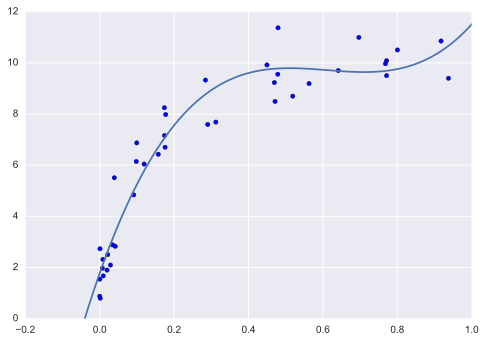

In [70]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Examining the relationship between the training score and validation score can give us useful insight into the performance of the model.

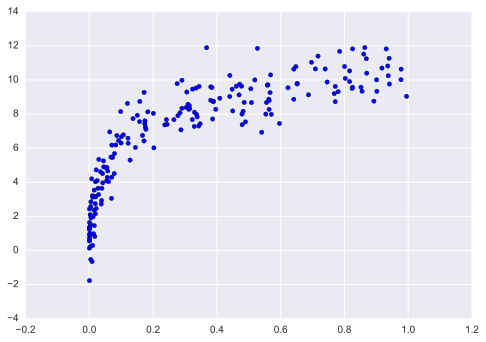

In [72]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

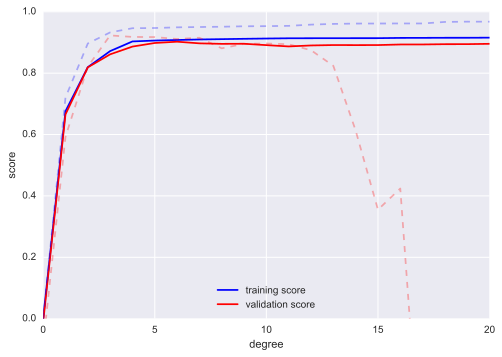

In [73]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

l. A plot of the training/validation score with respect to the size of the training set is known as a learning curve.

## Learning curves in scikit learn

c:\anaconda2\envs\py36\lib\site-packages\sklearn\learning_curve.py:198: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):
c:\anaconda2\envs\py36\lib\site-packages\sklearn\learning_curve.py:198: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


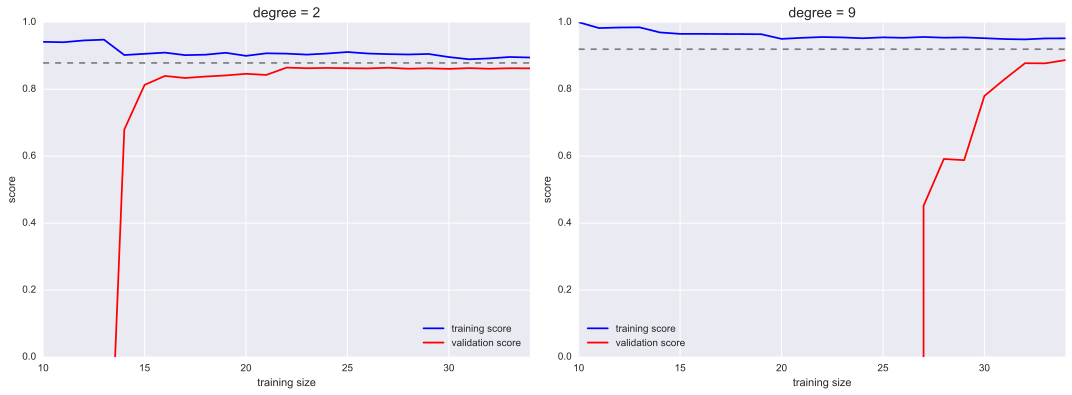

In [74]:
from sklearn.learning_curve import learning_curve


fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')


This shows us visually how the model responds to more training data... Plotting a learning curve for your particular choice of model and dataset can help you to make this type of decision about how to move forward in improving your analysis.

## Grid search

In [76]:
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)


c:\anaconda2\envs\py36\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [77]:
grid.fit(X, y);

In [78]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

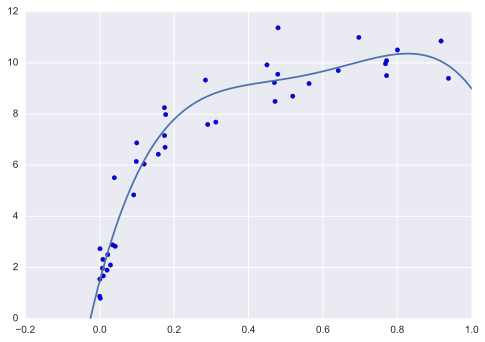

In [80]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);

***